<a href="https://colab.research.google.com/github/dst3v3n/Modelos-AI/blob/main/MML_LinearR_HACKATHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Regresion Lineal**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#Importando datos
df = pd.read_csv(r'datos_limpioscsv.csv')

# Mostrar las primeras filas para verificar
df.head()

,nacimiento,genero,industria,sector,nucleo,em_fom_remoto,em_fom_camb_remoto,t_dez_remoto,t_casa,t_familia,t_remoto_3meses,t_pref_remoto_3meses,h_trabajo_remoto
0,1976,1,13,31,1,2,2,0.0,1.0,7.0,0.5,0.8,8.0
1,1971,1,5,31,2,1,1,0.0,4.0,4.0,0.1,0.5,10.0
2,1974,1,8,25,1,2,2,0.0,3.0,4.0,1.0,1.0,9.0
3,1985,1,11,37,1,1,1,2.0,4.0,2.0,0.5,0.4,8.0
4,1992,2,2,2,2,2,2,0.5,0.5,5.0,1.0,1.0,9.0


In [3]:
# Separar las características y el objetivo
X = df.drop(columns=['h_trabajo_remoto', 'em_fom_remoto', 't_pref_remoto_3meses'])  # Características
y = df['h_trabajo_remoto']  # Objetivo


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
scaler = StandardScaler()

# Ajustar el escalador en el conjunto de entrenamiento y transformar ambos conjuntos
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## compilacion y entrenamiento

In [6]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

### prediccion y Metricas de evaluacion del modelo

In [7]:
# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')


Error Cuadrático Medio (MSE): 1.9555184725465544
Coeficiente de determinación (R^2): 0.5845953665208046


### mejorando con validacion cruzada

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'R2 promedio en validación cruzada: {np.mean(scores)}')


R2 promedio en validación cruzada: 0.6094318500078255


## **Pasos para importar, exportar y probar en la aplicacion**

### Exportar

In [9]:
import joblib

# Guardar el modelo en un archivo .pkl
joblib.dump(model, 'modelo_productividad.pkl')


['modelo_productividad.pkl']

### Importar

In [10]:
import joblib
import numpy as np

# Cargar el modelo desde el archivo .pkl
model = joblib.load('modelo_productividad.pkl')
# Guardar el escalador
joblib.dump(scaler, 'escalador_lineal.pkl')

['escalador_lineal.pkl']

### Introducir datos nuevos

In [13]:
# Ejemplo: Nuevos datos de entrada para predecir
nuevos_datos = np.array([[1990, 1, 8, 39, 7, 4, 0.5, 3, 2, 0.9]])  # Sustituye con tus valores

## Transformar los nuevos datos si utilizaste un escalador
nuevos_datos_escalados = scaler.transform(nuevos_datos)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Prediccion

In [14]:
# Realizar la predicción
prediccion = model.predict(nuevos_datos_escalados)

print(f'Predicción de horas de trabajo remoto: {prediccion[0]}')


Predicción de horas de trabajo remoto: 10.160805962263332


## Categorizacion para comparacion con modelo de logR con matriz de confusion

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

# Leer los datos
df = pd.read_csv('datos_limpioscsv.csv')

# Separar las características y el objetivo
X = df.drop(columns=['h_trabajo_remoto'])  # Características
y = df['h_trabajo_remoto']  # Objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir las predicciones y etiquetas verdaderas en categorías
def categorizar_productividad(horas):
    if horas <= 4.5:
        return 'Baja'
    elif horas <= 7.5:
        return 'Moderado'
    else:
        return 'Alta'

# Aplicar la categorización
y_test_categorico = y_test.apply(categorizar_productividad)
y_pred_categorico = pd.Series(y_pred).apply(categorizar_productividad)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_categorico, y_pred_categorico)

# Generar el classification report
class_report = classification_report(y_test_categorico, y_pred_categorico)

print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Reporte de clasificación:\n{class_report}')


Matriz de confusión:
[[394   1  33]
 [  2  13  14]
 [ 65  15  68]]
Reporte de clasificación:
              precision    recall  f1-score   support

        Alta       0.85      0.92      0.89       428
        Baja       0.45      0.45      0.45        29
    Moderado       0.59      0.46      0.52       148

    accuracy                           0.79       605
   macro avg       0.63      0.61      0.62       605
weighted avg       0.77      0.79      0.78       605



## Importancia de las características en el modelo de regresión lineal

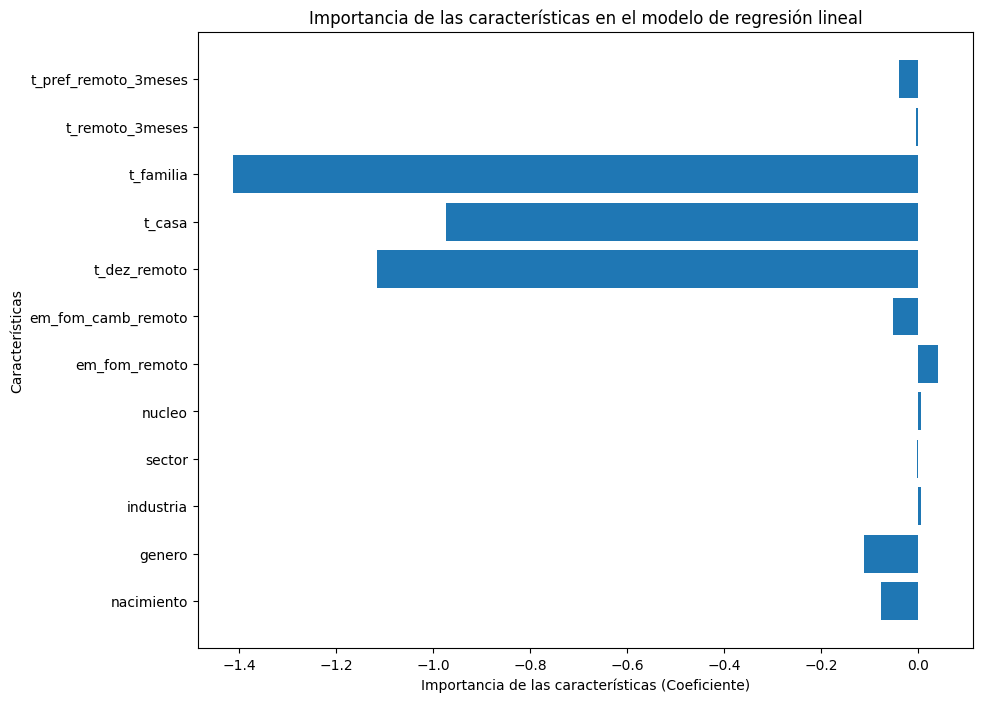

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los coeficientes del modelo entrenado
coef = model.coef_

# Crear un gráfico de barras para visualizar la importancia de cada característica
plt.figure(figsize=(10, 8))
plt.barh(X.columns, coef)
plt.xlabel("Importancia de las características (Coeficiente)")
plt.ylabel("Características")
plt.title("Importancia de las características en el modelo de regresión lineal")
plt.show()